<a href="https://colab.research.google.com/github/RufioAB/DataScienceProyects/blob/main/DataScienceP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Data Science - Joaquin Abel Barnada

**IMDB - Análisis de Datos**

Acerca del Conjunto de Datos
El conjunto de datos de IMDB contiene información sobre películas, incluyendo sus nombres, fechas de estreno, calificaciones de los usuarios, géneros, descripciones, miembros del reparto y del equipo de producción, títulos originales, estado de producción, idiomas originales, presupuestos, ingresos y países de origen. Estos datos pueden ser utilizados para diversos análisis, como identificar tendencias en los géneros cinematográficos, explorar la relación entre el presupuesto y los ingresos, qué géneros reciben mayor presupuesto y qué países obtienen mayores ganancias en sus películas.

**Preguntas a responder sobre el dataset**


1. ¿Existe una correlación positiva entre el presupuesto asignado a una película y las ganancias que genera?

2. ¿Cuáles son los géneros cinematográficos que reciben, en promedio, los mayores presupuestos de producción?

3. ¿Qué géneros se destacaron como los más populares en cada año del período analizado?

4. ¿La popularidad de una película, medida por indicadores como calificaciones o número de votos, se traduce en mayores ingresos económicos?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

**Limpieza de Datos (Data Wrangling):**


---

Me familiaricé con los tipos de datos y la estructura del conjunto de datos. Eliminé los duplicados y las columnas que no eran útiles, como orig_title, overview, entre otras.

Para el tratamiento de datos faltantes, utilicé dos métodos: para todos los datos faltantes con tipo de dato object, rellené los valores nulos con la cadena de texto "missing".

In [2]:
# cargar la informacion e imprimir el encabezado
df=pd.read_csv('imdb_movies.csv')
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [3]:
# confirmar las columnas y filas del dataset
df.shape

(10178, 12)

In [4]:
# verificar los tipos de datos si hay alguno mal categorizado
df.dtypes

,0
names,object
date_x,object
score,float64
genre,object
overview,object
crew,object
orig_title,object
status,object
orig_lang,object
budget_x,float64


In [5]:
# verificar en cada columna el numero de valores únicos
df.nunique()

,0
names,9660
date_x,5688
score,79
genre,2303
overview,9905
crew,9927
orig_title,9736
status,3
orig_lang,54
budget_x,2316


In [6]:
# Valores estadísticos para estos datos
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In [7]:
#Cantidad de valores nulos en cada columna
df.isnull().sum()

,0
names,0
date_x,0
score,0
genre,85
overview,0
crew,56
orig_title,0
status,0
orig_lang,0
budget_x,0


In [8]:
df.drop(['orig_title', 'names', 'overview', 'crew', 'orig_lang', 'orig_title'], axis=1, inplace=True)

df['genre'].fillna('missing',inplace=True)

<ipython-input-8-cdcbab76cd7f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].fillna('missing',inplace=True)


In [9]:
# confirm the data
df.isnull().sum()

,0
date_x,0
score,0
genre,0
status,0
budget_x,0
revenue,0
country,0


In [10]:
# check if there are some duplicates
df.duplicated().sum()

np.int64(12)

In [11]:
# drop the duplicates
df.drop_duplicates(inplace=True)     # do not forget inplace = True
# confirm again
df.duplicated().sum()

np.int64(0)

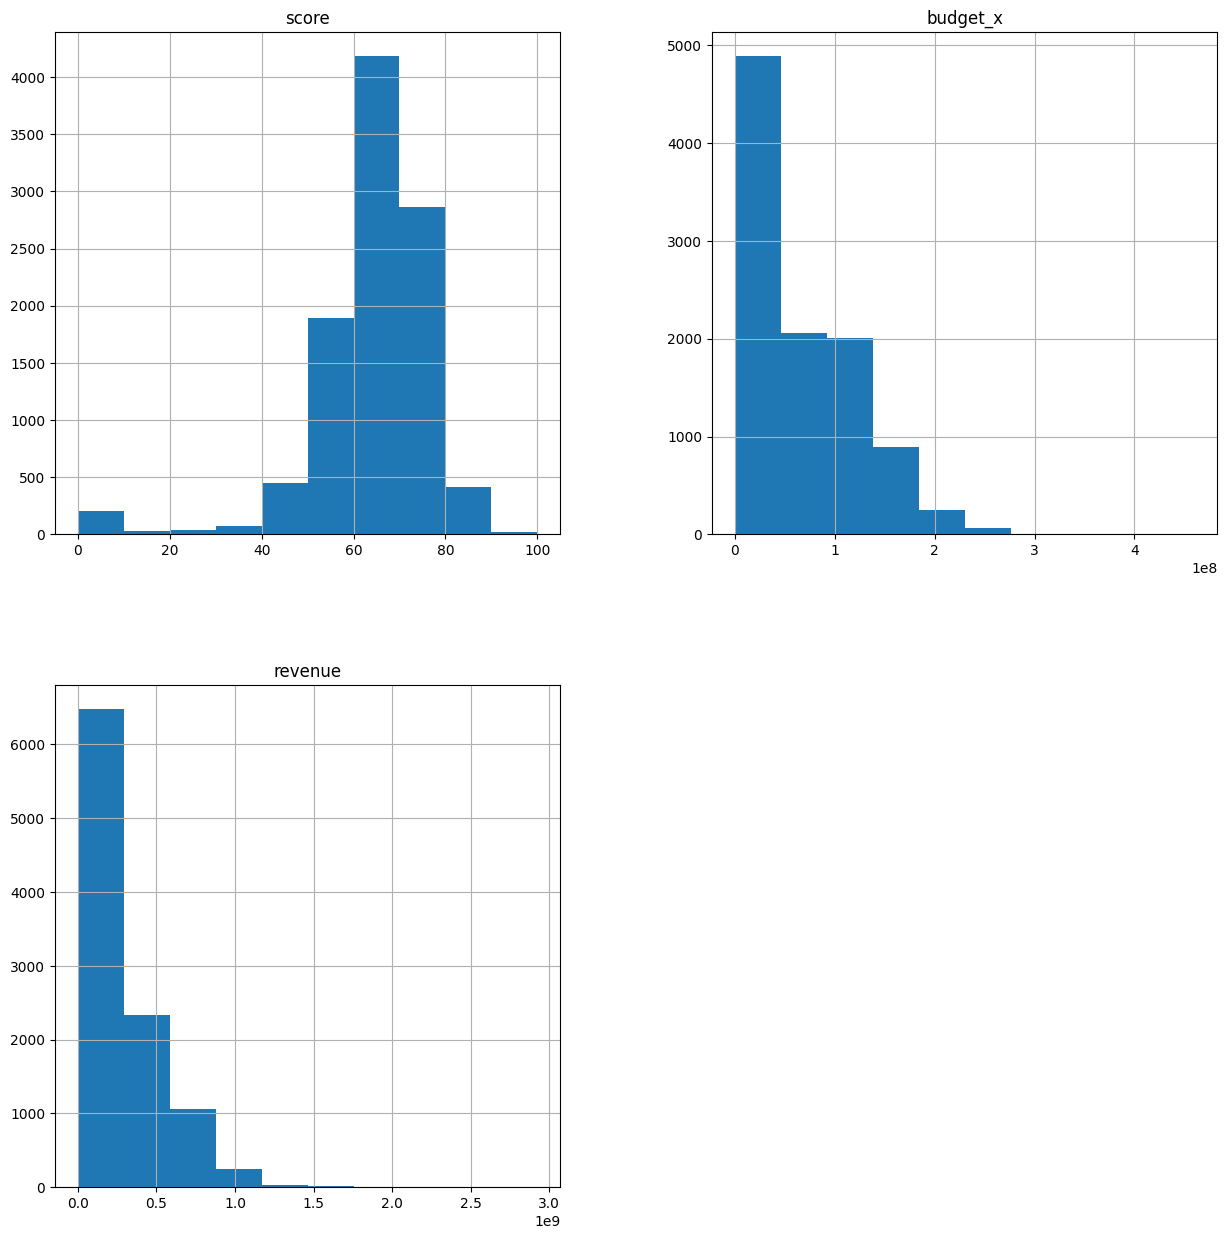

In [12]:
# visulize each variables
df.hist(figsize=(15,15));

Exploration with Visuals and Conclusions
Question 1. Does higher budget mean higher popularity ? Is there a coefficent relationship ?

Text(0, 0.5, 'popularity')

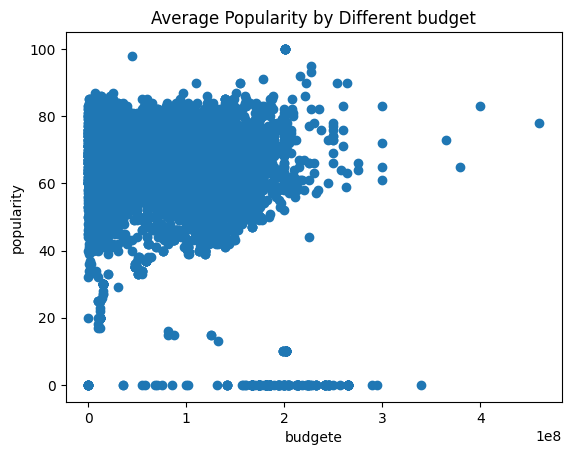

In [13]:
# plot the relation between budget and popularity
x = df['budget_x']
y = df['score']

plt.scatter(x,y)
plt.title('Average Popularity by Different budget',fontsize=12)
plt.xlabel('budgete',fontsize=10)
plt.ylabel('popularity',fontsize=10)

We can not see very strong relatioship between the budget and the popularity from above plot. Let's try to compare the data in another way: create two groups based on median value of budget

In [14]:
# based on median budget value to divide the budget into two groups : low and high
m = df['budget_x'].median()
low_budg =  df.query('budget_x < {}'.format(m))
high_budg =  df.query('budget_x >= {}'.format(m))

In [15]:
# check low budget and high budget mean values respecively
mean_popularity_of_low_budget = low_budg['score'].mean()
mean_popularity_of_high_budget = high_budg['score'].mean()

Text(0, 0.5, 'Average Popularity')

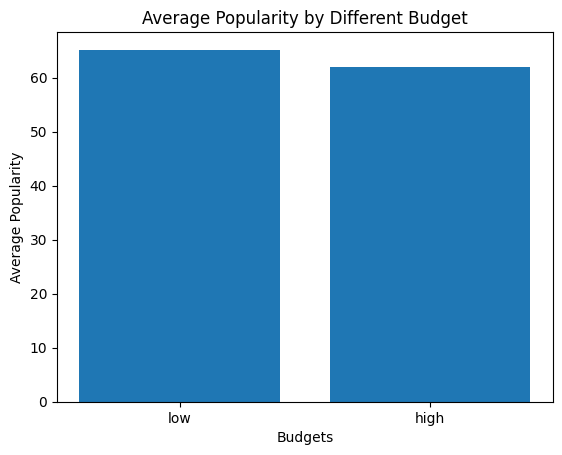

In [16]:
# create a bar chart with the values we get above
locations = [1,2]
heights = [mean_popularity_of_low_budget , mean_popularity_of_high_budget]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

In [17]:
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget) / mean_popularity_of_high_budget * 100
increase_percentage

np.float64(-5.045813312684992)

Conclusión para la primer pregunta:

Podemos observar que no hay una diferencia significativa entre la popularidad de las peliculas de menor y mayor presupuesto